In [1]:
import warnings 
import pandas as pd
warnings.filterwarnings("ignore")
#loan = pd.read_csv("loan/loan.csv",encoding="ISO-8859-1")
loan = pd.read_csv("loan/loan.csv")
loan.shape

(39717, 111)

Understand the dataset and categorize the different attributes respect to :
1. Applicant details 
2. Applicant credit history 
3. Loan details 

This will help identify the attributes required for analysis and help clear the unnecessary attributes available in the dataset .

Among the 111 attribute<li>s available, we can categorize the atributes as follows :
1. Applicant details :
     <li>addr_state
     <li>annual_inc
     <li>annual_inc_joint
     <li>emp_length
     <li>emp_title
     <li>home_ownership
     <li>verification_status
     <li>verified_status_joint
     <li>zip_code

    
 2. Applicant credit history (maynot be directly related to credit scores, gives the overall idea about the applicant approches and transactions)
    <li>avg_cur_bal
    <li>bc_open_to_buy
    <li>bc_util
    <li>chargeoff_within_12_mths
    <li>collection_recovery_fee
    <li>collections_12_mths_ex_med
    <li>delinq_2yrs
    <li>delinq_amnt
    <li>dti
    <li>dti_joint
    <li>earliest_cr_line
    <li>fico_range_high
    <li>fico_range_low
    <li>il_util
    <li>inq_last_12m
    <li>inq_last_6mths
    <li>last_fico_range_high
    <li>last_fico_range_low
    <li>last_pymnt_amnt
    <li>last_pymnt_d
    <li>max_bal_bc
    <li>mo_sin_old_il_acct
    <li>mo_sin_old_rev_tl_op
    <li>mo_sin_rcnt_rev_tl_op
    <li>mo_sin_rcnt_tl
    <li>mort_acc
    <li>mths_since_last_delinq
    <li>mths_since_last_major_derog
    <li>mths_since_last_record
    <li>mths_since_rcnt_il
    <li>mths_since_recent_bc
    <li>mths_since_recent_bc_dlq
    <li>mths_since_recent_inq
    <li>mths_since_recent_revol_delinq
    <li>num_accts_ever_120_pd
    <li>num_actv_bc_tl
    <li>num_actv_rev_tl
    <li>num_bc_sats
    <li>num_bc_tl
    <li>num_il_tl
    <li>num_op_rev_tl
    <li>num_rev_accts
    <li>num_rev_tl_bal_gt_0
    <li>num_sats
    <li>num_tl_120dpd_2m
    <li>num_tl_30dpd
    <li>num_tl_90g_dpd_24m
    <li>num_tl_op_past_12m
    <li>open_acc
    <li>open_acc_6m
    <li>open_il_12m
    <li>open_il_24m
    <li>open_il_6m
    <li>open_rv_12m
    <li>open_rv_24m
    <li>out_prncp
    <li>out_prncp_inv
    <li>pct_tl_nvr_dlq
    <li>percent_bc_gt_75
    <li>policy_code
    <li>pub_rec
    <li>pub_rec_bankruptcies
    <li>recoveries
    <li>revol_bal
    <li>revol_util
    <li>tax_liens
    <li>tot_coll_amt
    <li>tot_cur_bal
    <li>tot_hi_cred_lim
    <li>total_acc
    <li>total_bal_ex_mort
    <li>total_bal_il
    <li>total_bc_limit
    <li>total_cu_tl
    <li>total_rev_hi_lim  

 3. Loan details 
    <li>application_type
    <li>desc
    <li>funded_amnt
    <li>funded_amnt_inv
    <li>grade
    <li>id
    <li>initial_list_status
    <li>installment
    <li>int_rate
    <li>issue_d
    <li>last_credit_pull_d
    <li>loan_amnt
    <li>loan_status
    <li>member_id
    <li>next_pymnt_d
    <li>purpose
    <li>pymnt_plan
    <li>sub_grade
    <li>term
    <li>title
    <li>total_il_high_credit_limit
    <li>total_pymnt
    <li>total_pymnt_inv
    <li>total_rec_int
    <li>total_rec_late_fee
    <li>total_rec_prncp
    <li>url

Given the above list, attribute essential for the analysis needs to be identified 

1. Applicant Details -
    <li><b>addr_state  - To be kept as we may have patterns here</b> 
    <li><b>annual_inc  - Essential for analysis</b>  
    <li><b>annual_inc_joint - Essential for analysis</b>  
    <li><b>emp_length - Essential for analysis </b> 
    <li>emp_title - Need to be dropped, won't add value for analysis 
    <li><b>home_ownership - Essential for analysis </b> 
    <li><b>verification_status - Essential for analysis </b> 
    <li><b>verified_status_joint - Essential for analysis </b> 
    <li>zip_code - Need to be dropped, won't add value for analysis. 
2. Applicant Credit History 
    There are mutliple attrbutes available, we can keep only the one which gives overall summary of the credit history 
    <li><b>dti</b> 
    <li><b>dti_joint</b> 
    <li>pub_rec_bankruptcies

3. Loan Details 
    <li><b>application_type - To be kept as we may have patterns here</b> 
    <li>desc - Need to be dropped, won't add value for analysis. 
    <li>funded_amnt - Need to be dropped, won't add value for analysis. 
    <li>funded_amnt_inv - Need to be dropped, won't add value for analysis. 
    <li><b>grade - To be kept as we may have patterns here </b> 
    <li>id - Need to be dropped, won't add value for analysis. 
    <li>initial_list_status - Need to be dropped, won't add value for analysis. 
    <li><b>installment - Essential for analysis </b> 
    <li><b>int_rate - Essential for analysis </b> 
    <li><b>issue_d - Essential for analysis </b> 
    <li>last_credit_pull_d - Need to be dropped, won't add value for analysis. 
    <li><b>loan_amnt - Essential for analysis </b> 
    <li><b>loan_status - Essential for analysis </b> 
    <li>member_id - Need to be dropped, won't add value for analysis. 
    <li>next_pymnt_d - Need to be dropped, won't add value for analysis. 
    <li><b>purpose - Essential for analysis  -</b> 
    <li>pymnt_plan - Need to be dropped, won't add value for analysis. 
    <li><b>sub_grade - To be kept as we may have patterns here </b> 
    <li><b>term - To be kept as we may have patterns here </b> 
    <li>title -  Need to be dropped, won't add value for analysis. 
    <li>total_il_high_credit_limit - Need to be dropped, won't add value for analysis. 
    <li>total_pymnt - Need to be dropped, won't add value for analysis. 
    <li>total_pymnt_inv - Need to be dropped, won't add value for analysis. 
    <li>total_rec_int - Need to be dropped, won't add value for analysis. 
    <li>total_rec_late_fee - Need to be dropped, won't add value for analysis. 
    <li>total_rec_prncp - Need to be dropped, won't add value for analysis. 
    <li>url - Need to be dropped, won't add value for analysis. 




Now we have high level attribute identified for analysis.
Let's get the dataset with the required attributes only




In [2]:
loan=loan[["addr_state" ,"annual_inc", "annual_inc_joint","emp_length","home_ownership","verification_status",
           "verification_status_joint","dti","dti_joint","application_type",
           "grade","installment","int_rate","issue_d","loan_amnt","loan_status","purpose","sub_grade","term"]]
loan.shape

(39717, 19)

In [3]:
#Check values for attribute related to joint applicants 
print("****annual_inc_joint****")
print(loan["annual_inc_joint"].value_counts())
print("****dti_joint****")
print(loan["dti_joint"].value_counts())
print("****verification_status_joint****")
print(loan["verification_status_joint"].value_counts())
print("****application_type****")
print(loan["application_type"].value_counts())
#Check values subgrade 
print("****sub_grade****")
print(loan["sub_grade"].value_counts())
#Check values loan_status 
print("****loan_status****")
print(loan["loan_status"].value_counts())

****annual_inc_joint****
Series([], Name: annual_inc_joint, dtype: int64)
****dti_joint****
Series([], Name: dti_joint, dtype: int64)
****verification_status_joint****
Series([], Name: verification_status_joint, dtype: int64)
****application_type****
INDIVIDUAL    39717
Name: application_type, dtype: int64
****sub_grade****
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64
****loan_status****
Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


With above observation - 
1. We can ignore the columns related to joint applications 
2. application_type has only INDIVIDUAL value, it can be dropped
2. We can keep subgrade, could be useful when we identify patern among grades 
3. The Current loan status can be dropped 



In [4]:
loan=loan.drop(["annual_inc_joint","dti_joint","verification_status_joint","application_type"],axis=1)
loan.shape


(39717, 15)

In [5]:
loan=loan[loan["loan_status"]!="Current"]
loan.shape

(38577, 15)

In [6]:
#Validate if loan_status Current is dropped
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Let's check pattern for missing values in the selected columns

In [7]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

addr_state             0.00
annual_inc             0.00
emp_length             2.68
home_ownership         0.00
verification_status    0.00
dti                    0.00
grade                  0.00
installment            0.00
int_rate               0.00
issue_d                0.00
loan_amnt              0.00
loan_status            0.00
purpose                0.00
sub_grade              0.00
term                   0.00
dtype: float64

In [8]:
#With abovee data, we have employment length missing for 2.68% applicants. 
#Lets drop the data set with missing values 
loan = loan[~loan.emp_length.isna()]
loan.shape


(37544, 15)

In [9]:
# Valdate if the missing values are eliminated
round(100*(loan.isnull().sum()/len(loan.index)), 2)

addr_state             0.0
annual_inc             0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
dti                    0.0
grade                  0.0
installment            0.0
int_rate               0.0
issue_d                0.0
loan_amnt              0.0
loan_status            0.0
purpose                0.0
sub_grade              0.0
term                   0.0
dtype: float64

Let's look at the primary trends on few attrubutes  (Univariate analysis)

In [67]:
# Defining few functions to plot graphs. We will be using these later on for visualization
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def display_boxplot(variable):
    fig_dims = (18,2)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.boxplot( x=variable, data=loan,ax=ax)
    
def display_countplot(variable):
    fig_dims = (7,5)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=loan.loan_status, data=loan,hue=variable)

    
def display_bar_plot(variable):
    g=sns.countplot(x=loan[variable], data=loan)
    total = len(loan)
    sizes=[]
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height-15,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 
      


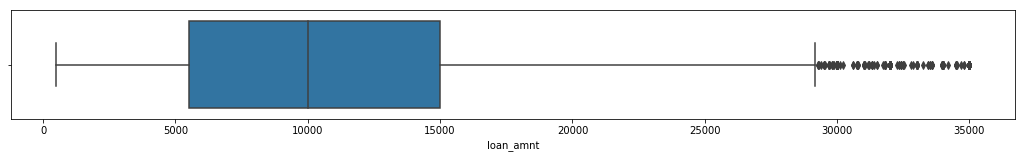

In [11]:
display_boxplot("loan_amnt")

Range of the loan processed is 5000-15000 with significant outliers beyond 30000

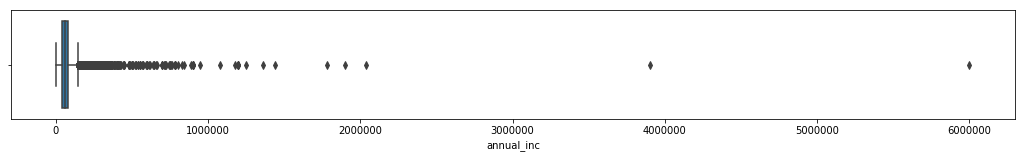

In [12]:
display_boxplot("annual_inc")


Most of the applicants have limited income - no sourceof income or minimum source of income.
There are few outliers which can be excuded from the analysis ...
Lets say,its safe to remove the outliers , applicant earning more than 1000000 can be excluded from the dataset


In [13]:
#Check how many outliers we are removing 
len(loan[loan["annual_inc"]>1000000])
#Remove the outliers and validate
loan=loan[loan["annual_inc"]<1000000]
loan.shape

(37530, 15)

From above we have clear income range of the applicants. Lets find using describe

In [14]:
loan.describe()

,annual_inc,dti,installment,loan_amnt
count,37530.000000,37530.000000,37530.000000,37530.000000
mean,68720.747033,13.288122,324.669605,11119.538369
std,47511.321260,6.657750,208.920047,7354.265544
min,4000.000000,0.000000,15.690000,500.000000
25%,41000.000000,8.160000,167.350000,5500.000000
50%,60000.000000,13.390000,280.000000,10000.000000
75%,83000.000000,18.550000,429.172500,15000.000000
max,948000.000000,29.990000,1305.190000,35000.000000


Now we have the income range of our applicants i.e. 41000-83000 with multiple outliers beyond 83000

Our target variable is loan_status where we want to analyze the impact on "Fully Paid" and "Charged Off" 

In [15]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37530 entries, 0 to 39716
Data columns (total 15 columns):
addr_state             37530 non-null object
annual_inc             37530 non-null float64
emp_length             37530 non-null object
home_ownership         37530 non-null object
verification_status    37530 non-null object
dti                    37530 non-null float64
grade                  37530 non-null object
installment            37530 non-null float64
int_rate               37530 non-null object
issue_d                37530 non-null object
loan_amnt              37530 non-null int64
loan_status            37530 non-null object
purpose                37530 non-null object
sub_grade              37530 non-null object
term                   37530 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 4.6+ MB


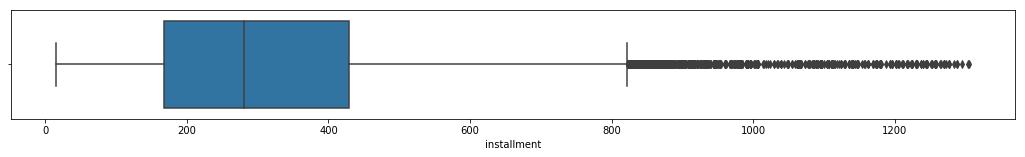

In [16]:
display_boxplot("installment")

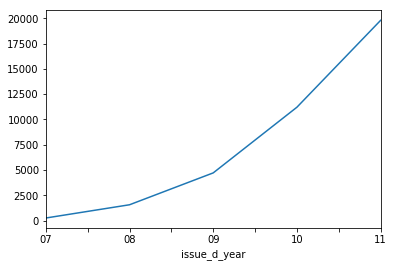

In [17]:
#Lets derive a new variable to reflect when was the loan issue if there is has any trend
loan['issue_d_month'], loan['issue_d_year'] = loan['issue_d'].str.split('-').str
loan.groupby('issue_d_year')['loan_status'].count().plot.line(x_compat=True)

No. of loan applications has been rapidly increasing rapidly in last years 

In [18]:
loan.int_rate=loan.int_rate.str.rstrip('%').astype(np.float)
loan.int_rate.value_counts()


10.99    891
11.49    766
7.51     755
13.49    736
7.88     700
7.49     629
9.99     570
7.90     552
11.71    542
5.42     524
11.99    469
10.37    451
12.69    440
8.49     419
6.03     413
12.99    396
12.42    393
10.65    392
5.79     390
11.86    383
7.29     379
6.62     376
8.90     371
9.63     368
10.59    348
14.27    336
9.91     331
5.99     329
12.53    327
7.14     327
        ... 
15.83      2
14.62      2
17.15      2
14.07      2
14.88      2
15.38      2
14.25      2
15.01      2
14.70      2
17.03      2
15.07      2
20.20      2
16.20      1
17.54      1
16.96      1
17.44      1
16.15      1
14.67      1
22.94      1
24.40      1
18.36      1
20.52      1
13.84      1
16.01      1
17.46      1
16.71      1
21.48      1
18.72      1
17.34      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

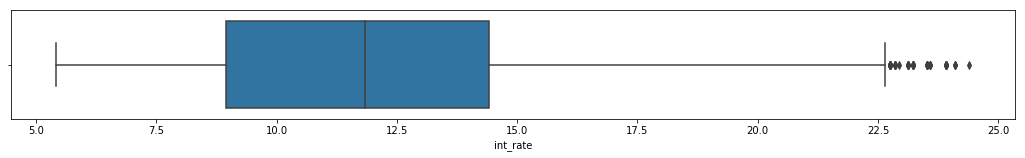

In [19]:
display_boxplot("int_rate")

8-14 is the typical interest used 

We will see now relation of attributes to loan status . As this will give understanding what is working for Fully Paid loans and what is not working for Charged Off loans 

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37530 entries, 0 to 39716
Data columns (total 17 columns):
addr_state             37530 non-null object
annual_inc             37530 non-null float64
emp_length             37530 non-null object
home_ownership         37530 non-null object
verification_status    37530 non-null object
dti                    37530 non-null float64
grade                  37530 non-null object
installment            37530 non-null float64
int_rate               37530 non-null float64
issue_d                37530 non-null object
loan_amnt              37530 non-null int64
loan_status            37530 non-null object
purpose                37530 non-null object
sub_grade              37530 non-null object
term                   37530 non-null object
issue_d_month          37530 non-null object
issue_d_year           37530 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 5.2+ MB


In [21]:
loan.addr_state.value_counts()[0:10]

CA    6766
NY    3597
FL    2693
TX    2604
NJ    1767
IL    1442
PA    1437
VA    1340
GA    1319
MA    1268
Name: addr_state, dtype: int64

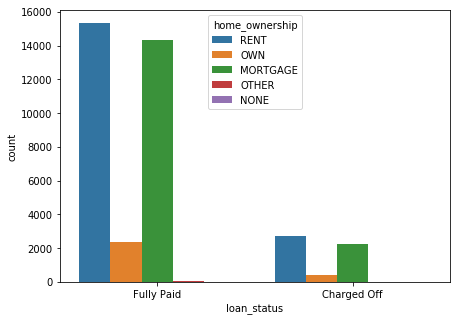

In [22]:
display_countplot("home_ownership")

Above clearly reflects most of applicants with Charged Off loan have Rnted property and we don't see any concern with other categories. Considering most applicants are from this area we need to be careful while approving loan

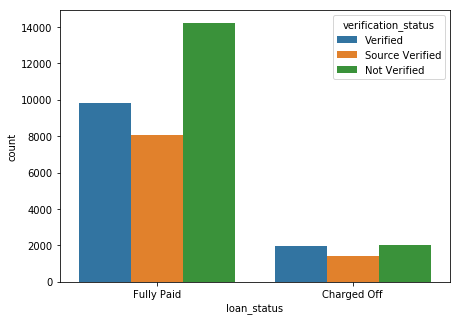

In [23]:
display_countplot("verification_status")

This is unexpeced behaviour, we might want to check whats causing Verified ones being defaulters


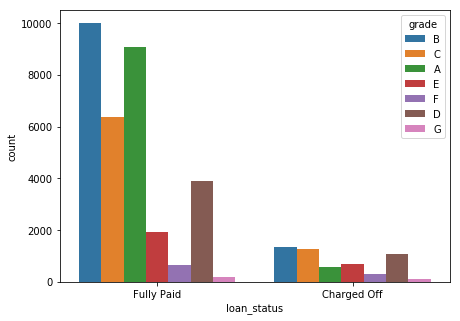

In [24]:
display_countplot("grade")

In [25]:
#Lets move to emp_length and see if there is any pattern 
#Let's check its values first as its not numerical
loan.emp_length.value_counts()

10+ years    8483
< 1 year     4507
2 years      4290
3 years      4011
4 years      3342
5 years      3193
1 year       3167
6 years      2168
7 years      1710
8 years      1434
9 years      1225
Name: emp_length, dtype: int64

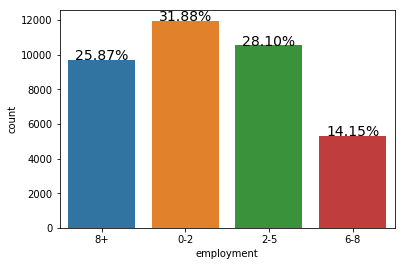

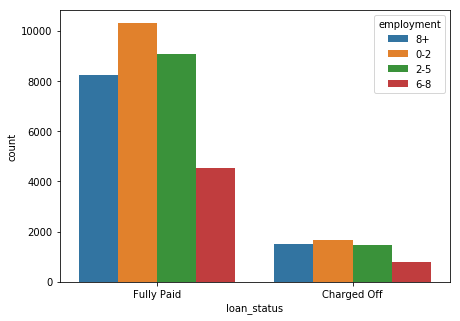

In [26]:
#Let's create derived variable using the applicants experience
#We will need to clean the data here first ..Lets remove - years, year string and convert it into numneric
def categorige_employment(emp):
    empS=str(emp.replace("years","").replace("year","").replace("<","").replace("+","")).strip()
    empN= int(empS)
    if(empN <=2): #0,1,2
        return "0-2"
    elif(2<empN<=5): #3,4,5
        return "2-5"
    elif(5<empN<=8): #6,7,8
        return "6-8"
    else:
        return "8+"


loan['employment']=loan.apply(lambda x: categorige_employment(x.emp_length),axis=1)
display_bar_plot("employment")
display_countplot("employment")

This is unexpeced behaviour, we might want to check whats causing Verified ones being defaulters


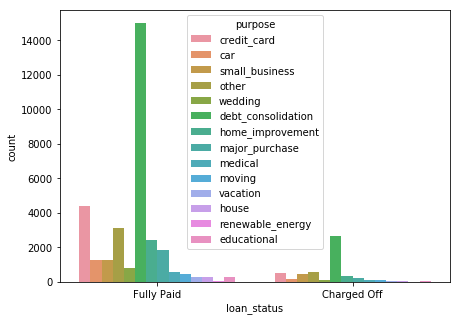

In [27]:
display_countplot("purpose")

In [60]:
from IPython.display import display
def find_pattern_with_loan_status(variable,x,y):
    dict_fully_paid = loan[loan["loan_status"]=="Fully Paid"][variable].value_counts().to_dict()
    dict_charged_off = loan[loan["loan_status"]=="Charged Off"][variable].value_counts().to_dict()
    total=len(loan)
    data=[]
    cols=[variable,"Fully Paid Off %","Charged Off %"]
    for key in dict_fully_paid:
        fully_paid= 0 if dict_fully_paid.get(key) is None else dict_fully_paid.get(key)
        charged_off=0 if dict_charged_off.get(key) is None else dict_charged_off.get(key)
        total=fully_paid+charged_off
        fully_paid_per = round((fully_paid/total)*100,2)
        charged_off_per = round((charged_off/total)*100,2)
        data.append([key,float(fully_paid_per),float(charged_off_per)])
        
    df = pd.DataFrame(data, columns=cols)
    df.set_index(variable, inplace=True)
    df=df.sort_values(variable)
    display(df)
    fig_dims = (x,y)
    fig, ax = plt.subplots(figsize=fig_dims)
    df.plot(kind='bar',ax=ax)  

,Fully Paid Off %,Charged Off %
grade,,
A,94.22,5.78
B,88.07,11.93
C,83.21,16.79
D,78.20,21.80
E,73.28,26.72
F,67.36,32.64
G,66.44,33.56


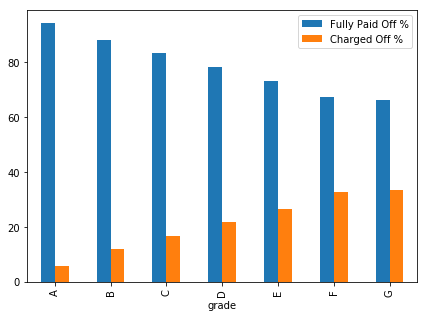

In [61]:
find_pattern_with_loan_status("grade",7,5)

In [30]:
?g.text()

Object `g.text()` not found.


,Fully Paid Off %,Charged Off %
grade,,
A,94.22,5.78
B,88.07,11.93
C,83.21,16.79
D,78.20,21.80
E,73.28,26.72
F,67.36,32.64
G,66.44,33.56


,Fully Paid Off %,Charged Off %
verification_status,,
Not Verified,87.41,12.59
Source Verified,85.29,14.71
Verified,83.41,16.59


,Fully Paid Off %,Charged Off %
addr_state,,
AK,80.26,19.74
AL,87.80,12.20
AR,88.55,11.45
AZ,85.86,14.14
CA,84.13,15.87
CO,87.75,12.25
CT,87.39,12.61
DC,92.89,7.11
DE,89.09,10.91


,Fully Paid Off %,Charged Off %
home_ownership,,
MORTGAGE,86.47,13.53
NONE,100.00,0.00
OTHER,81.63,18.37
OWN,85.55,14.45
RENT,84.86,15.14


,Fully Paid Off %,Charged Off %
purpose,,
car,89.30,10.70
credit_card,89.59,10.41
debt_consolidation,84.84,15.16
educational,83.60,16.40
home_improvement,88.14,11.86
house,83.33,16.67
major_purchase,89.85,10.15
medical,84.60,15.40
moving,84.78,15.22


,Fully Paid Off %,Charged Off %
employment,,
0-2,86.12,13.88
2-5,86.01,13.99
6-8,85.45,14.55
8+,84.66,15.34


,Fully Paid Off %,Charged Off %
term,,
36 months,89.13,10.87
60 months,74.87,25.13


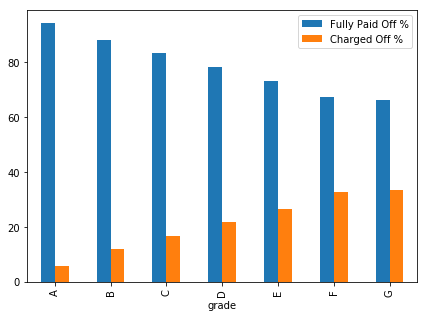

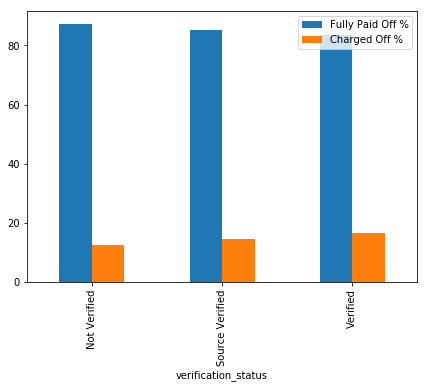

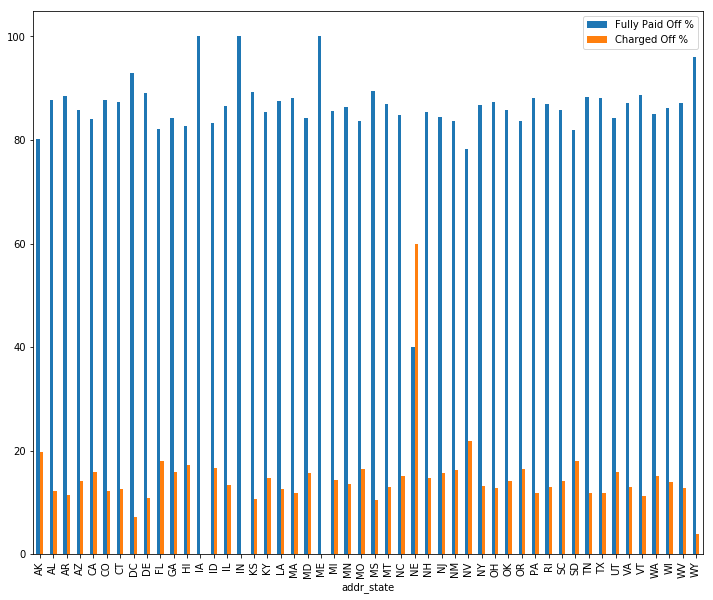

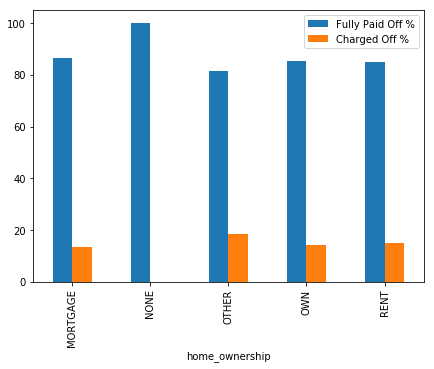

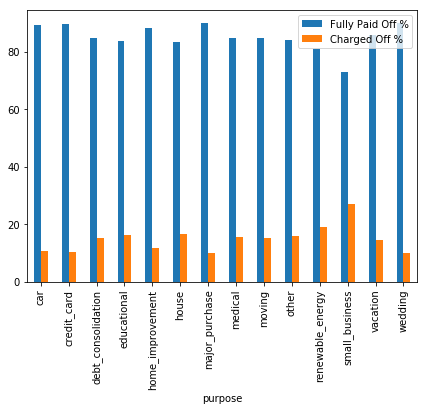

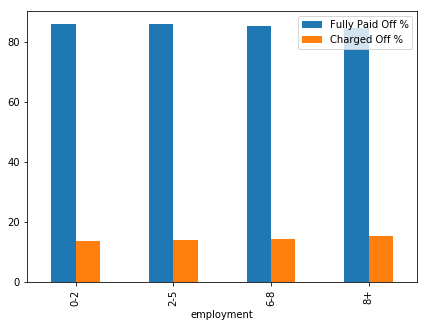

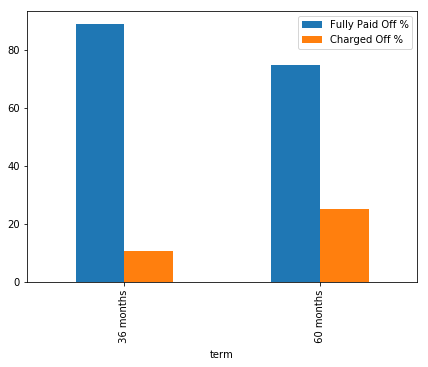

In [62]:
find_pattern_with_loan_status("grade",7,5)
find_pattern_with_loan_status("verification_status",7,5)
find_pattern_with_loan_status("addr_state",12,10)
find_pattern_with_loan_status("home_ownership",7,5)
find_pattern_with_loan_status("purpose",7,5)
find_pattern_with_loan_status("employment",7,5)
find_pattern_with_loan_status("term",7,5)

lets see if the selected attrubutes have any correleation to each other

In [32]:
loan.loan_amnt.describe()

count    37530.000000
mean     11119.538369
std       7354.265544
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [33]:
#Let's create derived variable using the loan amount
def categorige_loan(amnt):
    if(amnt <=5000): #0-5K
        return "0-5K"
    elif(5000<amnt<=10000): #5-10K
        return "5-10K"
    elif(10000<amnt<=15000): #10-15K
        return "10-15K"
    elif(15000<amnt<=20000): #15-20K
        return "15-20K"
    elif(20000<amnt<=25000): #20-25K
        return "20-25K"
    elif(25000<amnt<=30000): #25-30K
        return "25-30K"
    else:#30-35K
        return "30-35K"

,Fully Paid Off %,Charged Off %
loan_amt_cat,,
0-5K,86.51,13.49
10-15K,86.48,13.52
15-20K,82.76,17.24
20-25K,81.01,18.99
25-30K,79.48,20.52
30-35K,75.83,24.17
5-10K,87.37,12.63


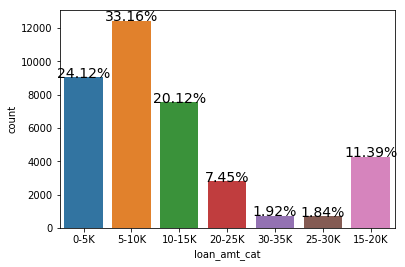

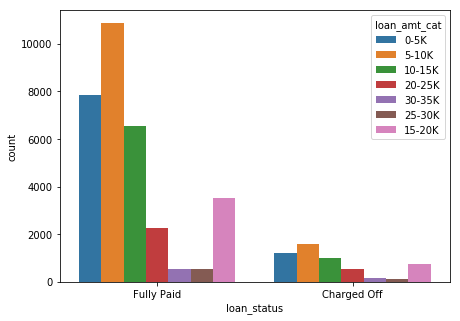

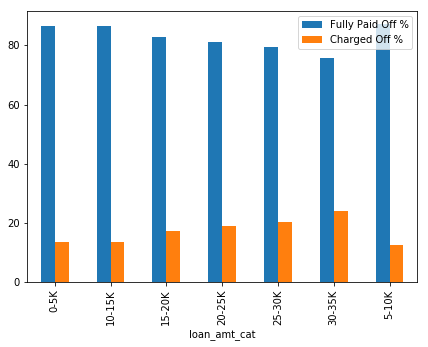

In [64]:
loan['loan_amt_cat']=loan.apply(lambda x: categorige_loan(x.loan_amnt),axis=1)
display_bar_plot("loan_amt_cat")
display_countplot("loan_amt_cat")
find_pattern_with_loan_status("loan_amt_cat",7,5)

,index,dti_cat,Fully Paid Off %,Charged Off %
0,0,10-15,85.67,14.33
1,1,15-20,84.42,15.58
2,2,5-10,87.39,12.61
3,3,20-25,83.36,16.64
4,4,0-5,87.66,12.34
5,5,25-30,86.74,13.26


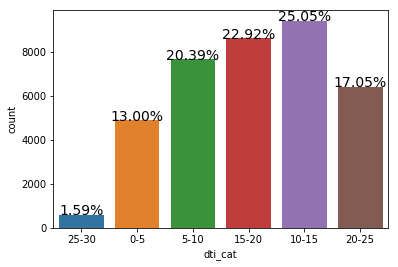

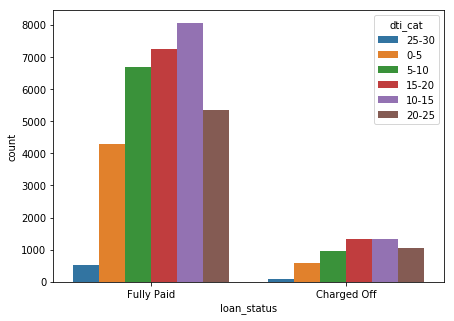

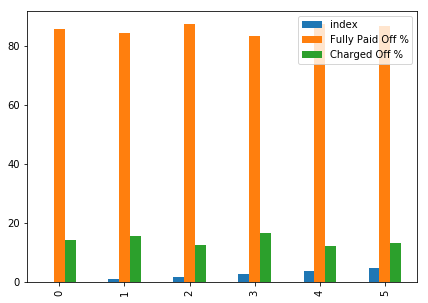

In [35]:
#Let's create derived variable using the loan amount
def categorige_dti(var):
    if(var <=5): #0-5
        return "0-5"
    elif(5<var<=10): #5-10
        return "5-10"
    elif(10<var<=15): #10-15
        return "10-15"
    elif(15<var<=20): #15-20
        return "15-20"
    elif(20<var<=25): #20-25
        return "20-25"
    else: #25-30
        return "25-30"
    
loan['dti_cat']=loan.apply(lambda x: categorige_dti(x.dti),axis=1)
display_bar_plot("dti_cat")
display_countplot("dti_cat")
find_pattern_with_loan_status("dti_cat",7,5)


In [66]:
display(loan.corr())

,annual_inc,dti,installment,int_rate,loan_amnt
annual_inc,1.000000,-0.143426,0.365106,0.067597,0.363370
dti,-0.143426,1.000000,0.050562,0.111953,0.061340
installment,0.365106,0.050562,1.000000,0.274718,0.931724
int_rate,0.067597,0.111953,0.274718,1.000000,0.299192
loan_amnt,0.363370,0.061340,0.931724,0.299192,1.000000


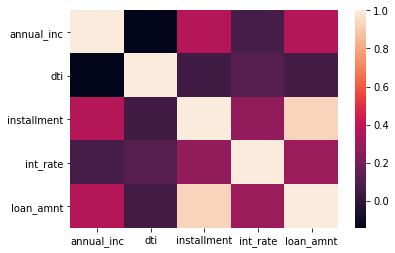

In [37]:
sns.heatmap(loan.corr())


Observations:
1. annual income - negative correlation with int_rate. higher the income, lesser the int_rate
2. dti - negatively correlated with every other attribute 
3. funded_amount - high correlation with funded_amnt_inv, installment & loan_amount
4. loan amount and fund amonth have high correlation 
5. installment have high correlation with funded_amount,installment & loan_amount
